# Project 1 - Ryan Waterman

## Project Outline:

Your CEO has decided that the company needs a full-time data scientist, and possibly a team of them in the future. She thinks she needs someone who can help drive data science within then entire organization and could potentially lead a team in the future. She understands that data scientist salaries vary widely across the world and is unsure what to pay them. To complicate matters, salaries are going up due to the great recession and the market is highly competitive. Your CEO has asked you to prepare an analysis on data science salaries and provide them with a range to be competitive and get top talent. The position can work offshore, but the CEO would like to know what the difference is for a person working in the United States. Your company is currently a small company but is expanding rapidly. 

Prepare your analysis in an R file. Your final product should be a power point presentation giving your recommendation to the CEO. CEOs do not care about your code and don’t want to see it. They want to see visuals and a well thought out analysis. You will need to turn in the power point and the code as a flat R file. 

The metadata are as follows:

| Column :|: Description|
|---------|------------|
work_year | The year the salary was paid.
experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
employment_type	| The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title | The role worked in during the year.
salary | The total gross salary amount paid.
salary_currency	| The currency of the salary paid as an ISO 4217 currency code.
salaryinusd	| The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



In [2]:
!pip install pandas seaborn matplotlib plotnine numpy

In [3]:
import pandas as pd

In [4]:
# First, let's read in the data and get a sense of what it looks like
data = pd.read_csv(r"Data\r project data-1.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Looks like the CVS file already had an index column in it. Let's drop it.
data.drop(data.columns[0],axis=1,inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
# The object dtypes all seem to contain categorical data. Let's convert them.
for col in data.columns:
    if data[f"{col}"].dtype == "object":
        categories = pd.unique(data[f"{col}"])
        data[f"{col}"] = pd.Categorical(data[f"{col}"], categories=categories)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    int64   
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    int64   
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(7), int64(4)
memory usage: 31.8 KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

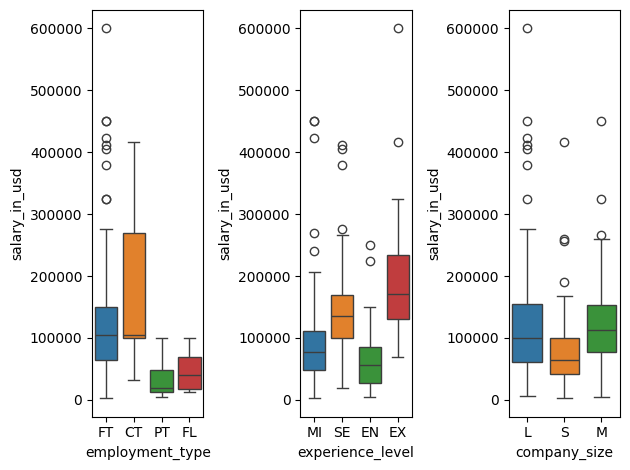

In [11]:
# I am curious about the relationship between some of the variables...
# Let's plot them

fig, axs = plt.subplots(nrows=1,ncols=3,)

sns.boxplot(x=data["employment_type"],y=data["salary_in_usd"], hue=data["employment_type"], ax=axs[0])
sns.boxplot(x=data["experience_level"],y=data["salary_in_usd"], hue=data["experience_level"], ax=axs[1])
sns.boxplot(x=data["company_size"],y=data["salary_in_usd"], hue=data["company_size"], ax=axs[2])

plt.tight_layout()
